In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
df_c = pd.read_csv('london_crime_by_lsoa.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [38]:
df_c

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0
...,...,...,...,...,...,...,...
91039,E01002716,Islington,Violence Against the Person,Assault with Injury,1.0,2009.0,2.0
91040,E01004486,Wandsworth,Burglary,Burglary in a Dwelling,1.0,2009.0,10.0
91041,E01002334,Havering,Other Notifiable Offences,Other Notifiable,0.0,2009.0,6.0
91042,E01004267,Tower Hamlets,Drugs,Drug Trafficking,0.0,2011.0,8.0


In [39]:
df_c.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
91039,E01002716,Islington,Violence Against the Person,Assault with Injury,1.0,2009.0,2.0
91040,E01004486,Wandsworth,Burglary,Burglary in a Dwelling,1.0,2009.0,10.0
91041,E01002334,Havering,Other Notifiable Offences,Other Notifiable,0.0,2009.0,6.0
91042,E01004267,Tower Hamlets,Drugs,Drug Trafficking,0.0,2011.0,8.0
91043,E,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91044 entries, 0 to 91043
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lsoa_code       91044 non-null  object 
 1   borough         91043 non-null  object 
 2   major_category  91043 non-null  object 
 3   minor_category  91043 non-null  object 
 4   value           91043 non-null  float64
 5   year            91043 non-null  float64
 6   month           91043 non-null  float64
dtypes: float64(3), object(4)
memory usage: 4.9+ MB


In [41]:
df_c.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [42]:
df_c.index.values

array([    0,     1,     2, ..., 91041, 91042, 91043])

In [43]:
df_c.shape

(91044, 7)

In [44]:
#clean up dataset
df_c.drop(['lsoa_code', 'value', 'minor_category'], 
          axis=1, inplace=True)

#rename colomns
df_c.rename(columns={'major_category':'kejahatan_besar', 
                     'borough':'wilayah', 'month':'bulan'}, inplace=True)

df_c.columns = list(map(str, df_c.columns))

# df_c.set_index('wilayah', inplace=True)

#add total column
df_c['Total'] = df_c.sum(axis=1)

print('data dimension', df_c.shape)

data dimension (91044, 5)


<ipython-input-44-70179750a04b>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_c['Total'] = df_c.sum(axis=1)


In [45]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.7.1


In [46]:
df_c

,wilayah,kejahatan_besar,year,bulan,Total
0,Croydon,Burglary,2016.0,11.0,2027.0
1,Greenwich,Violence Against the Person,2016.0,11.0,2027.0
2,Bromley,Violence Against the Person,2015.0,5.0,2020.0
3,Redbridge,Burglary,2016.0,3.0,2019.0
4,Wandsworth,Robbery,2008.0,6.0,2014.0
...,...,...,...,...,...
91039,Islington,Violence Against the Person,2009.0,2.0,2011.0
91040,Wandsworth,Burglary,2009.0,10.0,2019.0
91041,Havering,Other Notifiable Offences,2009.0,6.0,2015.0
91042,Tower Hamlets,Drugs,2011.0,8.0,2019.0


In [47]:
wilayah = df_c[df_c['wilayah'] == 'Hillingdon']
wilayah

,wilayah,kejahatan_besar,year,bulan,Total
14,Hillingdon,Theft and Handling,2016.0,2.0,2018.0
34,Hillingdon,Violence Against the Person,2008.0,10.0,2018.0
176,Hillingdon,Violence Against the Person,2016.0,11.0,2027.0
185,Hillingdon,Violence Against the Person,2014.0,5.0,2019.0
201,Hillingdon,Criminal Damage,2010.0,8.0,2018.0
...,...,...,...,...,...
90922,Hillingdon,Criminal Damage,2015.0,8.0,2023.0
90925,Hillingdon,Robbery,2013.0,1.0,2014.0
90954,Hillingdon,Robbery,2016.0,10.0,2026.0
90982,Hillingdon,Violence Against the Person,2014.0,1.0,2015.0


In [48]:
value_sum_bulan = wilayah.groupby(['bulan'])['Total'].sum().reset_index()
value_sum_bulan

,bulan,Total
0,1.0,493113.0
1,2.0,499472.0
2,3.0,467431.0
3,4.0,510015.0
4,5.0,506252.0
5,6.0,478309.0
6,7.0,510828.0
7,8.0,535279.0
8,9.0,509326.0
9,10.0,527848.0


In [49]:
import seaborn as sns

In [ ]:
value_sum_bulan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bulan   12 non-null     float64
 1   Total   12 non-null     float64
dtypes: float64(2)
memory usage: 320.0 bytes


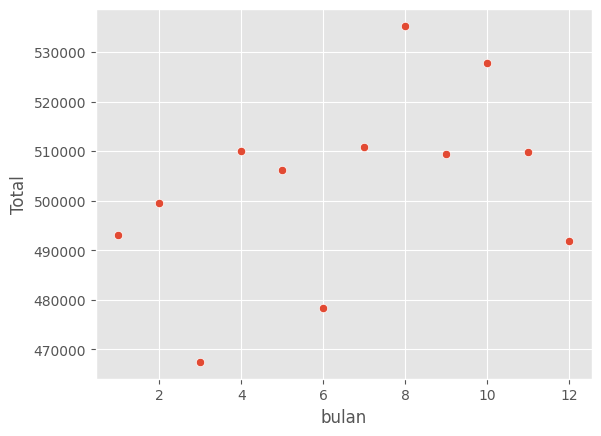

In [50]:
gfg = sns.scatterplot(x='bulan', y='Total', data=value_sum_bulan, sizes=(20,200))
plt.show()

In [51]:
top_6_wilayah = df_c.groupby(['year', 'wilayah'])['Total'].sum().reset_index()
top_6_wilayah = top_6_wilayah[(top_6_wilayah['year'] > 2008) & (top_6_wilayah['year'] <2014)]

top_6_wilayah = top_6_wilayah.loc[(top_6_wilayah['wilayah'] == 'Wandsworth') | (top_6_wilayah['wilayah'] == 'Tower Hamlets') | (top_6_wilayah['wilayah'] == 'Bexley') | (top_6_wilayah['wilayah'] == 'Barking and Dagenham') | (top_6_wilayah['wilayah'] == 'Barnet')]
top_6_wilayah

,year,wilayah,Total
33,2009.0,Barking and Dagenham,419194.0
34,2009.0,Barnet,878712.0
35,2009.0,Bexley,588520.0
62,2009.0,Tower Hamlets,626745.0
64,2009.0,Wandsworth,767931.0
66,2010.0,Barking and Dagenham,481951.0
67,2010.0,Barnet,848842.0
68,2010.0,Bexley,552483.0
95,2010.0,Tower Hamlets,566716.0
97,2010.0,Wandsworth,758239.0


In [52]:
xs = top_6_wilayah['wilayah'].unique().tolist()
lists= []
lists_final = []
lists_final.append(xs)

for x in xs:
    lists.append(top_6_wilayah[top_6_wilayah['wilayah']==x]['Total'].values.tolist())
lists2 = list(map(list, zip(*lists)))

for x in lists2:
    lists_final.append(x)
dict = {'wilayah': lists_final[0], '2019':  lists_final[1], '2020':  lists_final[2], '2021':  lists_final[3], '2022':  lists_final[4], '2023' :  lists_final[5]} 
df_top6_wilayah_6tahun = pd.DataFrame(dict)
    
df_top6_wilayah_6tahun 

,wilayah,2019,2020,2021,2022,2023
0,Barking and Dagenham,419194.0,481951.0,486226.0,522798.0,508881.0
1,Barnet,878712.0,848842.0,899894.0,865983.0,874336.0
2,Bexley,588520.0,552483.0,585014.0,567051.0,577650.0
3,Tower Hamlets,626745.0,566716.0,651638.0,645992.0,626128.0
4,Wandsworth,767931.0,758239.0,702056.0,851855.0,767337.0


In [53]:
df_top6_wilayah_6tahun.transpose()

,0,1,2,3,4
wilayah,Barking and Dagenham,Barnet,Bexley,Tower Hamlets,Wandsworth
2019,419194.0,878712.0,588520.0,626745.0,767931.0
2020,481951.0,848842.0,552483.0,566716.0,758239.0
2021,486226.0,899894.0,585014.0,651638.0,702056.0
2022,522798.0,865983.0,567051.0,645992.0,851855.0
2023,508881.0,874336.0,577650.0,626128.0,767337.0


In [54]:
years = [2019,2020,2021,2022,2023]
years

[2019, 2020, 2021, 2022, 2023]

In [55]:
list_top6_transpose = df_top6_wilayah_6tahun.transpose().values.tolist()[1:]
dict = {'Barking and Dagenham': list_top6_transpose[4], 'Barnet':  list_top6_transpose[3], 'Bexley':  list_top6_transpose[2], 'Tower Hamlets':  list_top6_transpose[1], 'Wandsworth':  list_top6_transpose[0] } 
df_top6_transpose = pd.DataFrame(dict, index=[years])
df_top6_transpose

,Barking and Dagenham,Barnet,Bexley,Tower Hamlets,Wandsworth
2019,508881.0,522798.0,486226.0,481951.0,419194.0
2020,874336.0,865983.0,899894.0,848842.0,878712.0
2021,577650.0,567051.0,585014.0,552483.0,588520.0
2022,626128.0,645992.0,651638.0,566716.0,626745.0
2023,767337.0,851855.0,702056.0,758239.0,767931.0


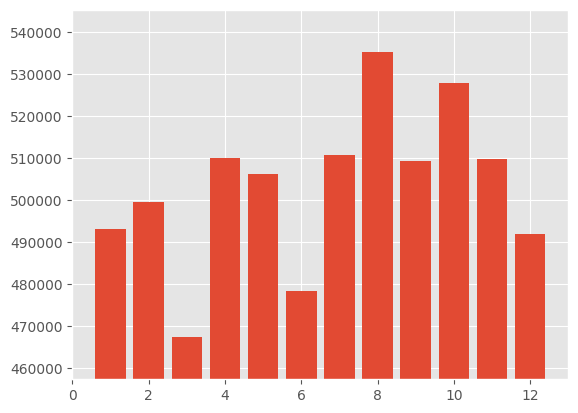

In [56]:
max_y_lim = max(value_sum_bulan['Total'])+10000
min_y_lim = min(value_sum_bulan['Total'])-10000
plt.ylim(min_y_lim, max_y_lim)
plt.xlim([0,13])
# plt.step([1])
# plt.plot(value_sum_bulan['bulan'].values.tolist(), value_sum_bulan['Total'].values.tolist(), color='red', marker='o', markersize=5, linestyle='--', linewidth=3)
plt.bar(value_sum_bulan['bulan'].values.tolist(), value_sum_bulan['Total'].values.tolist())
plt.show()

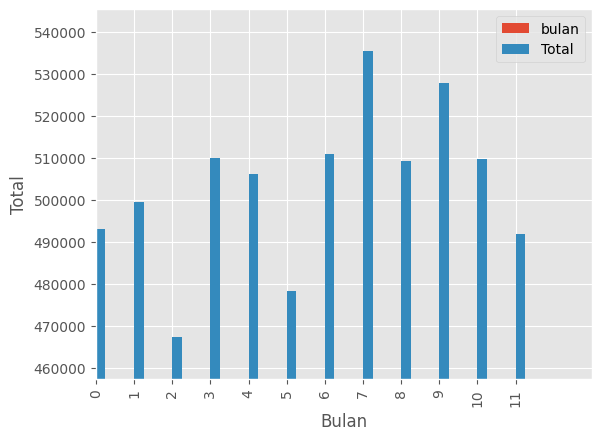

In [57]:
value_sum_bulan.plot(kind='bar')
max_y_lim = max(value_sum_bulan['Total'])+10000
min_y_lim = min(value_sum_bulan['Total'])-10000
plt.ylim(min_y_lim, max_y_lim)
plt.xlim([0,13])

plt.xlabel('Bulan') # add to x-label to the plot
plt.ylabel('Total') # add y-label to the plot

plt.show()

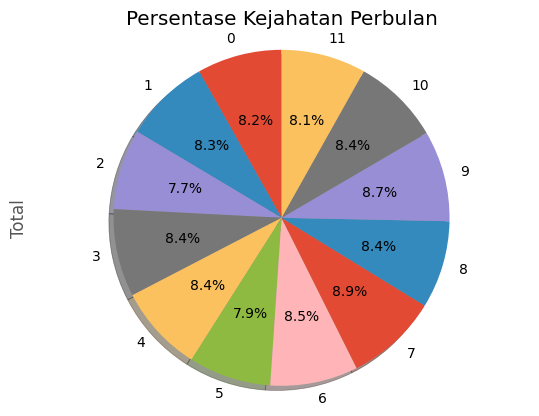

In [58]:
value_sum_bulan['Total'].plot(kind='pie',
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Persentase Kejahatan Perbulan')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

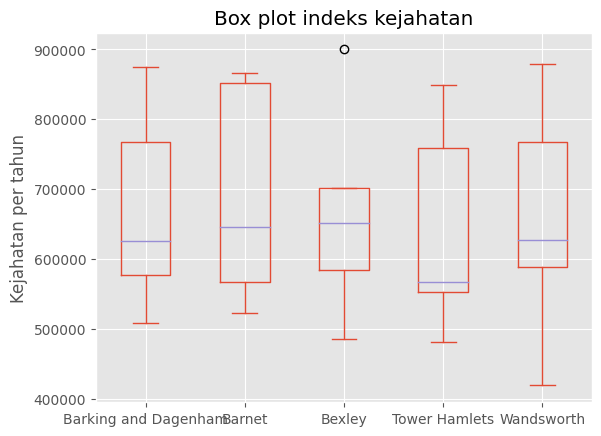

In [59]:
df_top6_transpose.plot(kind='box')

plt.title('Box plot indeks kejahatan')
plt.ylabel('Kejahatan per tahun')

plt.show()

In [60]:
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


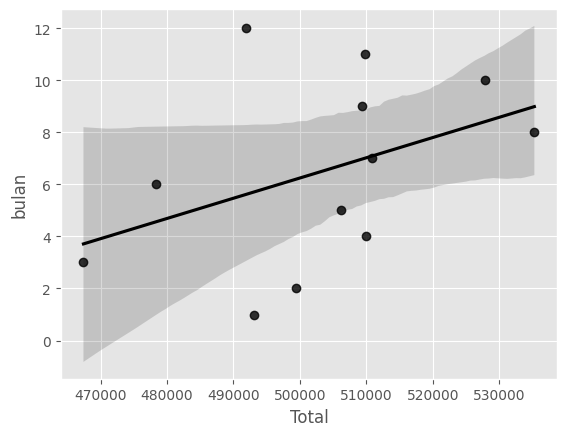

In [61]:
#visualisasi data Scatter Plot
import seaborn as sns
ax = sns.regplot(x='Total', y='bulan', data=value_sum_bulan, color='black')

In [62]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [64]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [65]:
wilayah2 = df_c['wilayah'].value_counts().reset_index()
wilayah2.columns=['wilayah', 'count']
wilayah2 = wilayah2[:20]
wilayah2

,wilayah,count
0,Croydon,3954
1,Barnet,3856
2,Ealing,3641
3,Enfield,3529
4,Lambeth,3493
5,Wandsworth,3478
6,Bromley,3468
7,Brent,3419
8,Southwark,3318
9,Lewisham,3217


In [66]:
total_kejahatan = wilayah2['count'].sum()
total_kejahatan

63539

In [67]:
wilayah2['wilayah'].values

array(['Croydon', 'Barnet', 'Ealing', 'Enfield', 'Lambeth', 'Wandsworth',
       'Bromley', 'Brent', 'Southwark', 'Lewisham', 'Newham',
       'Hillingdon', 'Redbridge', 'Hackney', 'Haringey', 'Waltham Forest',
       'Greenwich', 'Tower Hamlets', 'Havering', 'Camden'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

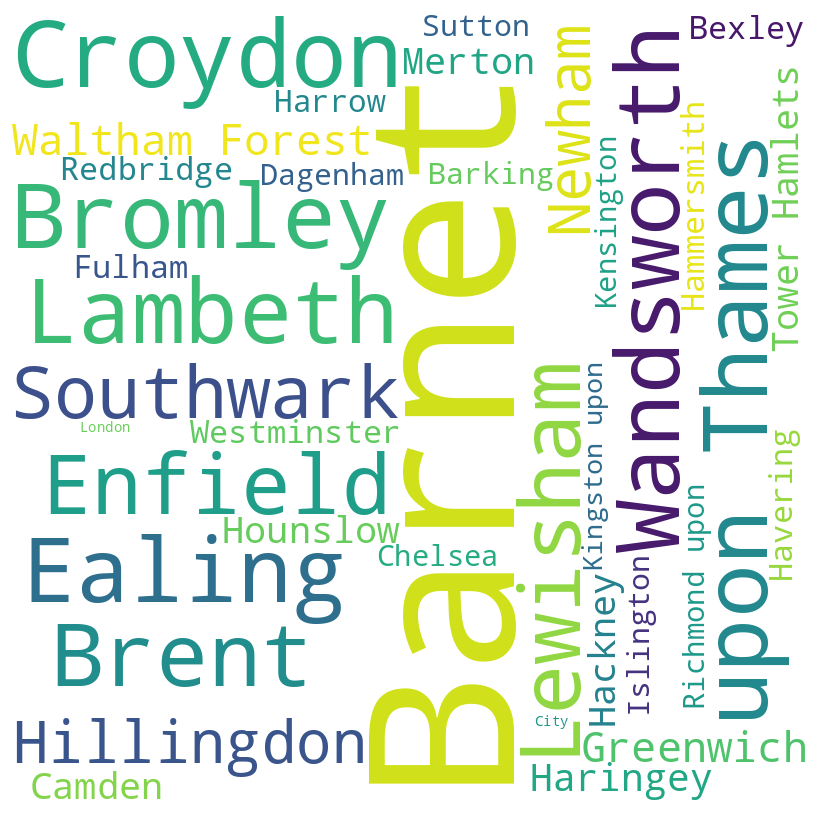

In [68]:
df_city = df_c.sample(frac = 0.1)

word_cloud = WordCloud(width=800, height=800, background_color='white')

text = " ".join(cat for cat in df_city['wilayah'])

word_cloud.generate(text)

plt.figure(figsize=(8,8), facecolor= None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show

In [69]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [70]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [71]:
df_c.shape

(91044, 5)

In [73]:
limit = 100
df_incidents = df_c.iloc[0:limit, :]

In [74]:
df_incidents.shape

(100, 5)

In [75]:
df_incidents.head()

,wilayah,kejahatan_besar,year,bulan,Total
0,Croydon,Burglary,2016.0,11.0,2027.0
1,Greenwich,Violence Against the Person,2016.0,11.0,2027.0
2,Bromley,Violence Against the Person,2015.0,5.0,2020.0
3,Redbridge,Burglary,2016.0,3.0,2019.0
4,Wandsworth,Robbery,2008.0,6.0,2014.0


In [76]:
latitude = 51.4060
longitude = 0.0132

In [77]:
bromley_map = folium.Map(location=[latitude, longitude], zoom_start=15)

# display the map of San Francisco
bromley_map